# Лабораторная работа 6

## Вариант 4

1. Исследовать влияние уровня автоматизации процесса разработки на трудоемкость (РМ) и время разработки проекта (ТМ) для модели COCOMO и разных типов проектов (обычного, промежуточного, встроенного). Получить значения PM и ТМ по всем типам проектов для одного и того же значения параметра размера программного кода (SIZE), выбрав номинальный, низкий и высокий уровень использования современных методов и программных инструментов. Результаты исследований оформить графически.

2. Компания получила заказ на разработку программного обеспечения для рабочей станции дизайнера автомобиля. Заказчик следующим образом определил проблемную область в своей спецификации: ПО должно формировать 2-х и 3-х мерные изображения для дизайнера, система должна иметь стандартизованный графический интерфейс, геометрические и прикладные данные должны содержаться в базе данных (планируемый размер базы данных не более 200 тыс. записей). При анализе проекта его размер был предварительно оценен в 140 000 строк кода. Проект реализуется по промежуточному варианту. Все показатели драйверов затрат, кроме трех имеют номинальное значение. Знание языка программирования имеет высокую оценку, использование современных методов – очень высокую оценку и использование программных инструментов – низкую, так как используется стандартная среда визуального программирования. Произвести оценку показателей проекта по методике СОСОМО.

In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

plt.rcParams['figure.figsize'] = [18, 13]

#### Атрибуты программного продукта

In [2]:
RELY = np.array([0.75, 0.86, 1.00, 1.15, 1.40])
DATA = np.array([None, 0.94, 1.00, 1.08, 1.16])
CPLX = np.array([0.70, 0.85, 1.00, 1.15, 1.30])

#### Атрибуты компьютера

In [3]:
TIME = np.array([None, None, 1.00, 1.11, 1.50])
STOR = np.array([None, None, 1.00, 1.06, 1.21])
VIRT = np.array([None, 0.87, 1.00, 1.15, 1.30])
TURN = np.array([None, 0.87, 1.00, 1.07, 1.15])

#### Атрибуты персонала

In [4]:
ACAP = np.array([1.46, 1.19, 1.00, 0.86, 0.71])
AEXP = np.array([1.29, 1.15, 1.00, 0.91, 0.82])
PCAP = np.array([1.42, 1.17, 1.00, 0.86, 0.70])
VEXP = np.array([1.21, 1.10, 1.00, 0.90, None])
LEXP = np.array([1.14, 1.07, 1.00, 0.95, None])

#### Атрибуты проекта

In [5]:
MODP = np.array([1.24, 1.10, 1.00, 0.91, 0.82])
TOOL = np.array([1.24, 1.10, 1.00, 0.91, 0.82])
SCED = np.array([1.23, 1.08, 1.00, 1.04, 1.10])

#### Коэффициенты

In [6]:
NORMAL  = {'c1': 3.2, 'p1': 1.05, 'c2': 2.5, 'p2': 0.38, 'mode': 'normal'}
INTER   = {'c1': 3.0, 'p1': 1.12, 'c2': 2.5, 'p2': 0.35, 'mode': 'intermediate'}
BUILDIN = {'c1': 2.8, 'p1': 1.20, 'c2': 2.5, 'p2': 0.32, 'mode': 'build in'}

#### Результат учета уточняющих факторов 

In [7]:
def eaf(parameters: np.array) -> float:
    return np.prod(parameters)

#### Трудозатраты

In [8]:
def labor_costs(coefficients: dict, eaf: float, size: float) -> float:
    return coefficients['c1'] * eaf * size ** coefficients['p1']

#### Время

In [9]:
def time(coefficients: dict, labor: float) -> float:
    return coefficients['c2'] * labor ** coefficients['p2']

#### Таблица значений

In [10]:
INDEX = {
    'Очень низкий': 0,
    'Низкий': 1,
    'Номинальный': 2,
    'Высокий': 3,
    'Очень высокий': 4,
}

PARAMETERS = {
    'RELY': RELY[2],
    'DATA': DATA[2],
    'CPLX': CPLX[2],
    'TIME': TIME[2],
    'STOR': STOR[2],
    'VIRT': VIRT[2],
    'TURN': TURN[2],
    'ACAP': ACAP[2],
    'AEXP': AEXP[2],
    'PCAP': PCAP[2],
    'VEXP': VEXP[2],
    'LEXP': LEXP[2],
    'MODP': MODP[2],
    'TOOL': TOOL[2],
    'SCED': SCED[2],
}

TABLE = {
    'RELY': RELY,
    'DATA': DATA,
    'CPLX': CPLX,
    'TIME': TIME,
    'STOR': STOR,
    'VIRT': VIRT,
    'TURN': TURN,
    'ACAP': ACAP,
    'AEXP': AEXP,
    'PCAP': PCAP,
    'VEXP': VEXP,
    'LEXP': LEXP,
    'MODP': MODP,
    'TOOL': TOOL,
    'SCED': SCED,
}

## Задание 1

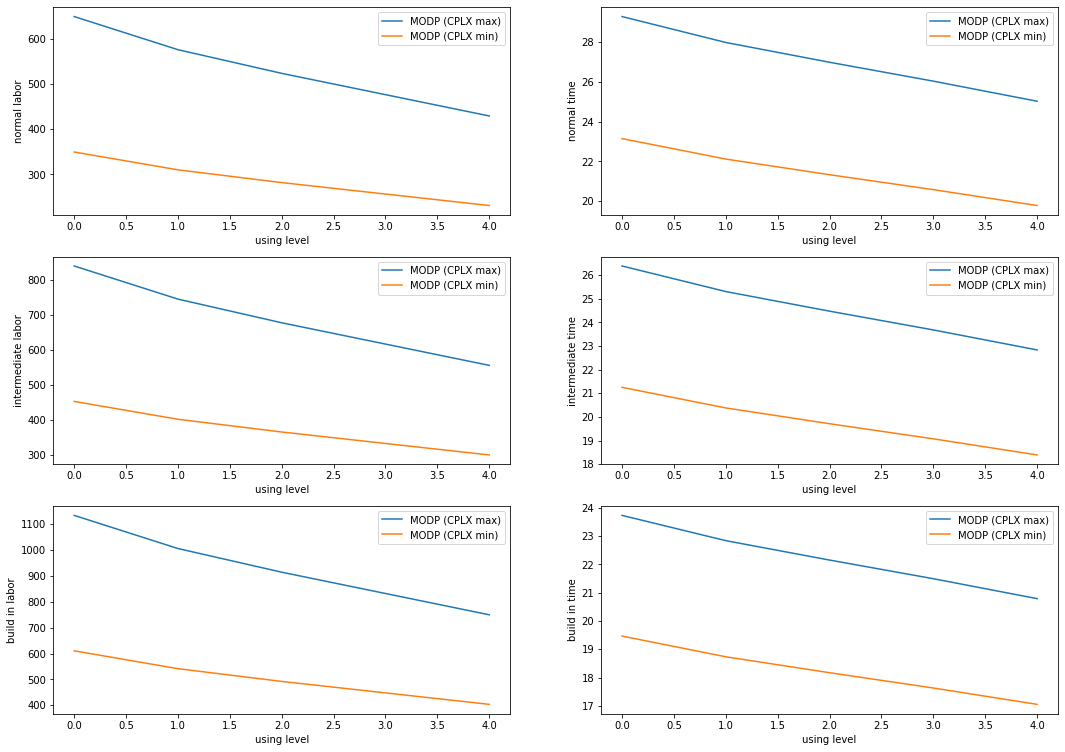

In [18]:
labor_place = 1
time_place = 2
for mode in [NORMAL, INTER, BUILDIN]:
    labor_modp = []
    time_modp = []
    labor_tool = []
    time_tool = []
    level = [i for i in range(5)]
    
    for i in level:
        par_modp = PARAMETERS.copy()
        par_modp['MODP'] = MODP[i]
        par_modp['CPLX'] = CPLX[4]
        par_modp = np.array(list(par_modp.values()))
        
        eaf_value = eaf(par_modp)
        labor_costs_value = labor_costs(mode, eaf_value, 100)
        time_value = time(mode, labor_costs_value)
        labor_modp.append(labor_costs_value)
        time_modp.append(time_value)
        
        par_tool = PARAMETERS.copy()
        par_tool['MODP'] = MODP[i]
        par_tool['CPLX'] = CPLX[0]
        par_tool = np.array(list(par_tool.values()))
        
        eaf_value = eaf(par_tool)
        labor_costs_value = labor_costs(mode, eaf_value, 100)
        time_value = time(mode, labor_costs_value)
        labor_tool.append(labor_costs_value)
        time_tool.append(time_value)
    
    plt.subplot(3, 2, labor_place)
    plt.xlabel('using level')
    plt.ylabel(mode['mode'] + ' labor')
    plt.plot(level, labor_modp, label='MODP (CPLX max)')
    plt.plot(level, labor_tool, label='MODP (CPLX min)')
    plt.legend()
    
    plt.subplot(3, 2, time_place)
    plt.xlabel('using level')
    plt.ylabel(mode['mode'] + ' time')
    plt.plot(level, time_modp, label='MODP (CPLX max)')
    plt.plot(level, time_tool, label='MODP (CPLX min)')
    plt.legend()
    
    labor_place += 2
    time_place += 2

## Задание 2

In [12]:
time_calculation = time
@interact(
    rely=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    data=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    cplx=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    time=['Номинальный', 'Высокий', 'Очень высокий'],
    stor=['Номинальный', 'Высокий', 'Очень высокий'],
    virt=['Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    turn=['Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    acap=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    aexp=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    pcap=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    vexp=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий'],
    lexp=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий'],
    modp=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    tool=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    sced=['Очень низкий', 'Низкий', 'Номинальный', 'Высокий', 'Очень высокий'],
    mode=['Обычный', 'Промежуточный', 'Встроенный'],
    size='100'
)
def _(rely='Номинальный',
    data='Номинальный',
    cplx='Номинальный',
    time='Номинальный',
    stor='Номинальный',
    virt='Номинальный',
    turn='Номинальный',
    acap='Номинальный',
    aexp='Номинальный',
    pcap='Номинальный',
    vexp='Номинальный',
    lexp='Номинальный',
    modp='Номинальный',
    tool='Номинальный',
    sced='Номинальный',
    mode='Обычный',
    size='100'):
    args = [rely, data, cplx, time, stor, virt, turn, acap, aexp, pcap, vexp, lexp, modp, tool, sced]
    par = PARAMETERS.copy()
    i = 0
    for key in par.keys():
        par[key] = TABLE[key][INDEX[args[i]]]
        i += 1
    if mode == 'Обычный':
        mode = NORMAL
    elif mode == 'Промежуточный':
        mode = INTER
    elif mode == 'Встроенный':
        mode = BUILDIN
    size = int(size)
    eaf_value = eaf(list(par.values()))
    labor_costs_value = labor_costs(mode, eaf_value, size)
    time_value = time_calculation(mode, labor_costs_value)
    return {'Трудозатраты': labor_costs_value, 'Время': time_value}

interactive(children=(Dropdown(description='rely', index=2, options=('Очень низкий', 'Низкий', 'Номинальный', …

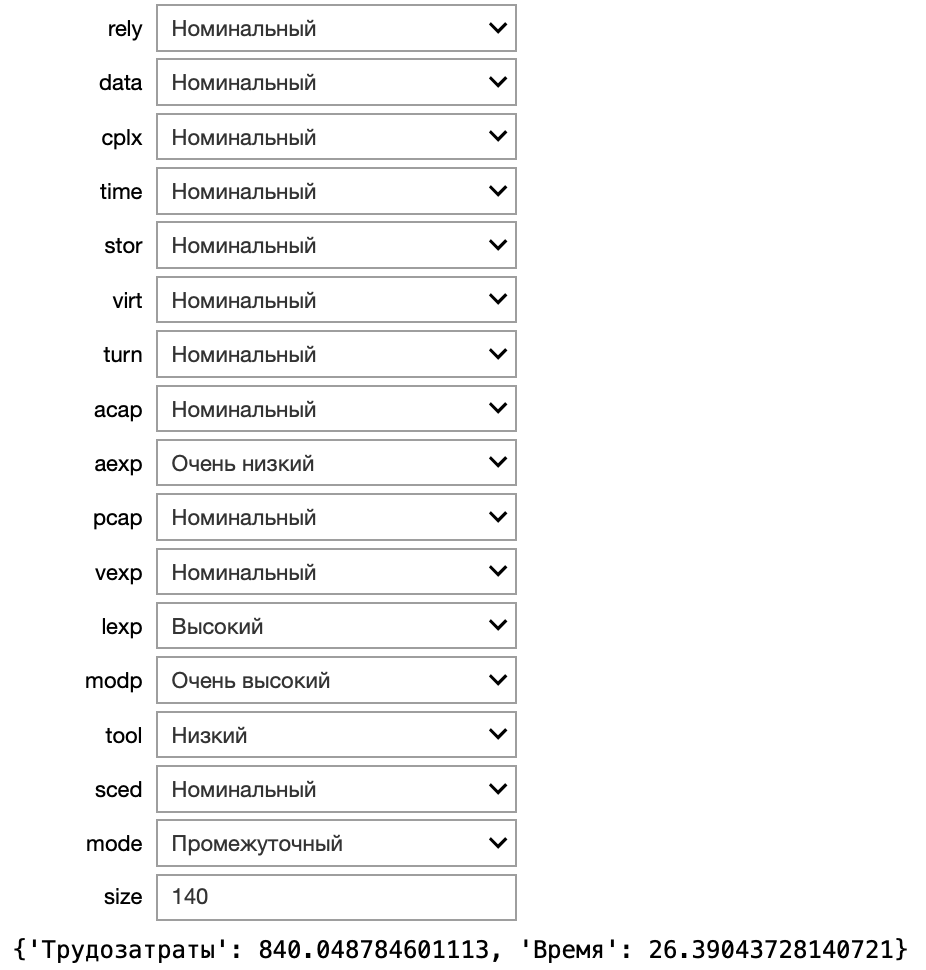